In [1]:

import diamon_read_data as dia
import influx_data_query as idb
import numpy as np
import pandas as pd
import datetime
import pickle
import plotting as p
import importlib
import pytz
import diamon_analysis as da
import main
from influx_data_utils.process_influx_data.datetime_localiser import \
    DatetimeLocaliser
ts2_path = r"C:\Users\sfs81547\Documents\diamon\ts2\DIAMON*"
location_path = r"C:\Users\sfs81547\OneDrive - Science and Technology Facilities Council\Documents\ISIS\Diamon Project\Code\data\Measurement_location.csv"
fname = "shutters_pickle.pkl"


In [2]:
#dont run again
"""
dates = [datetime.datetime(2022,10,10), datetime.datetime(2023,2,11)]
query_data = da.influx_db_query(dates)
da.save_pickle(query_data, "11-02-shutters")
"""

'\ndates = [datetime.datetime(2022,10,10), datetime.datetime(2023,2,11)]\nquery_data = da.influx_db_query(dates)\nda.save_pickle(query_data, "11-02-shutters")\n'

In [3]:
importlib.reload(main)
importlib.reload(dia)
importlib.reload(da)
main_data = main.main()

In [4]:
data = main_data["all_data"]
beam_df = main_data["df"]
open_shutters = main_data["open_shutter"]
closed_shutters = main_data["closed_shutter"]

In [5]:
importlib.reload(da)
open_shutters = da.filter_shutter_status(data, True)
closed_shutters = da.filter_shutter_status(data, False)

In [ ]:
importlib.reload(da)
#run once
open_shutters = da.average_repeated_data(open_shutters)
closed_shutters = da.average_repeated_data(closed_shutters)
data = {key: da.filter_low_beam_current(result, 25) for key, result in data.items()}

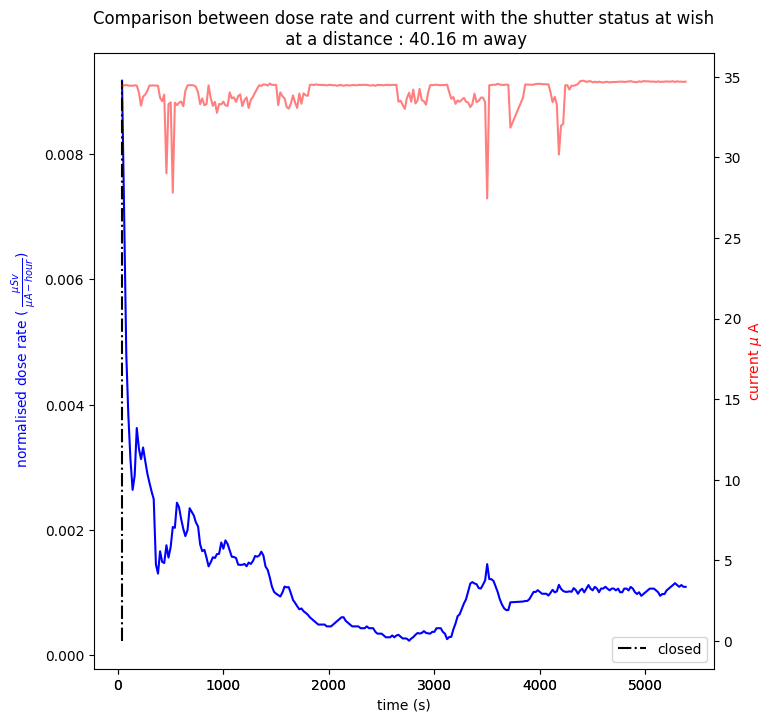

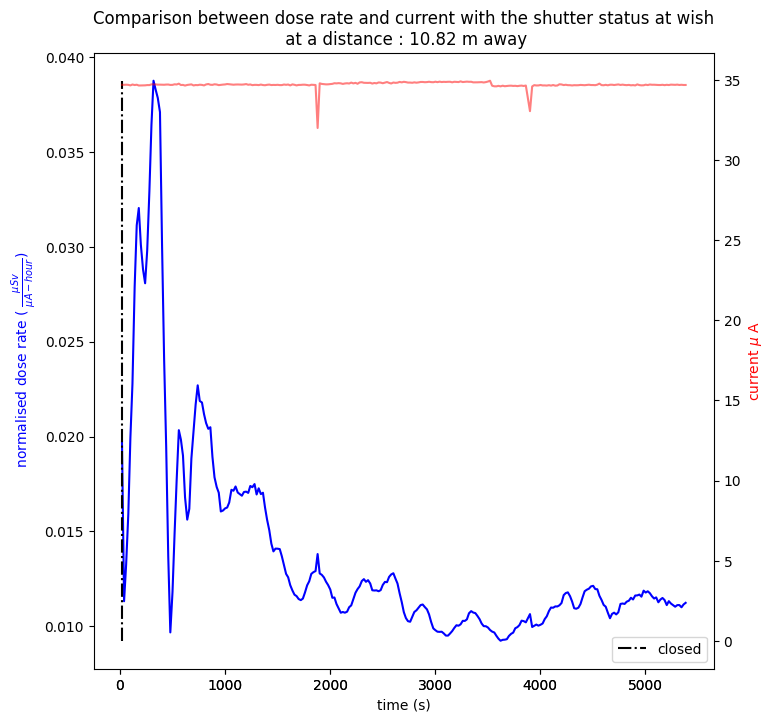

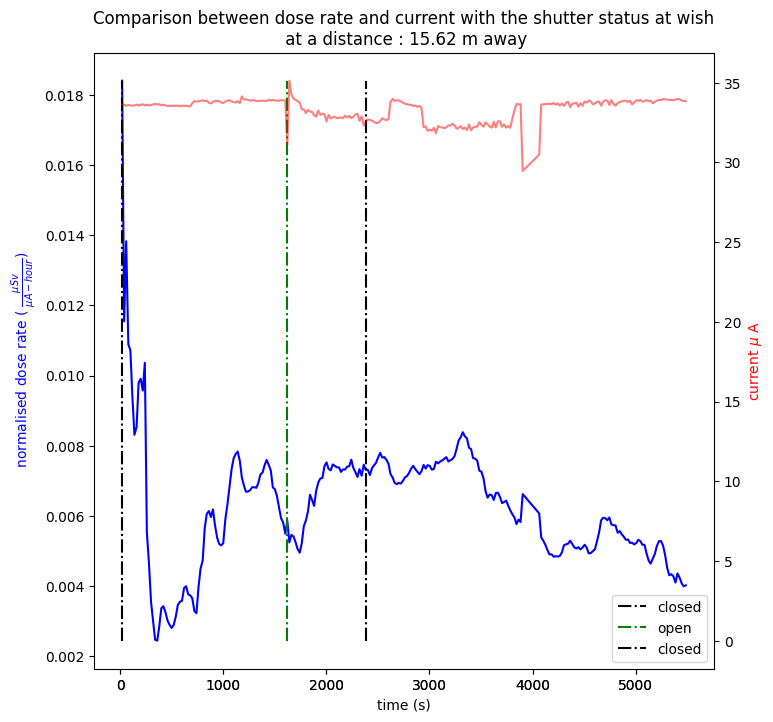

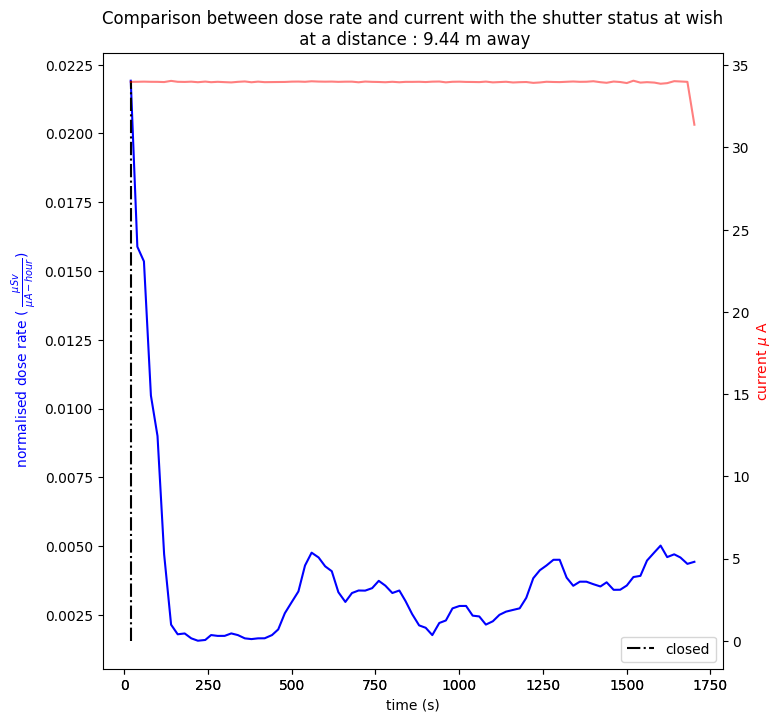

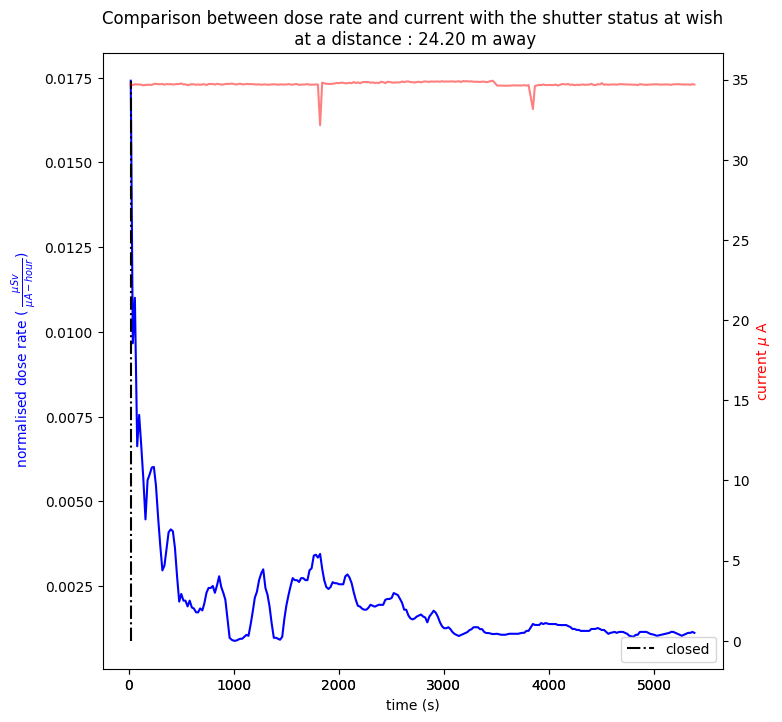

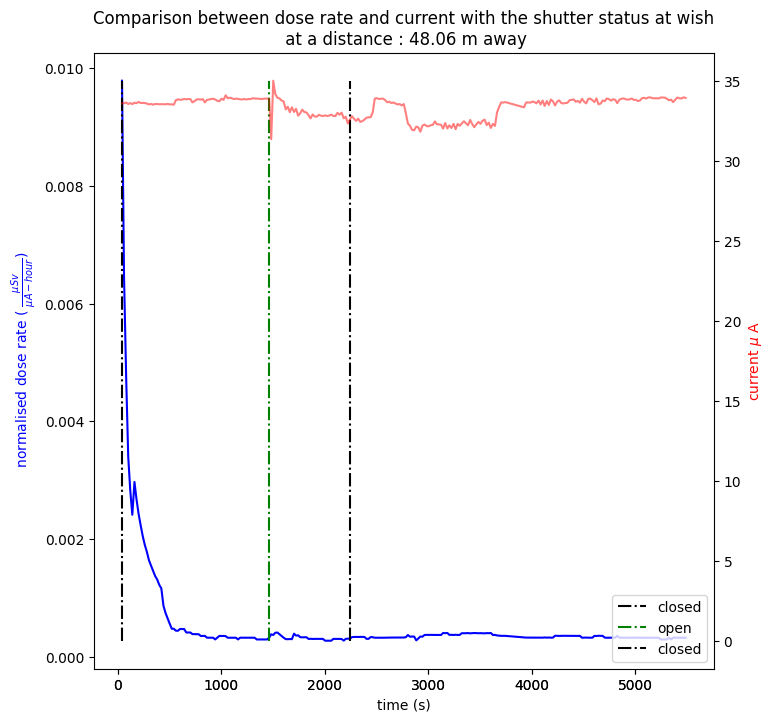

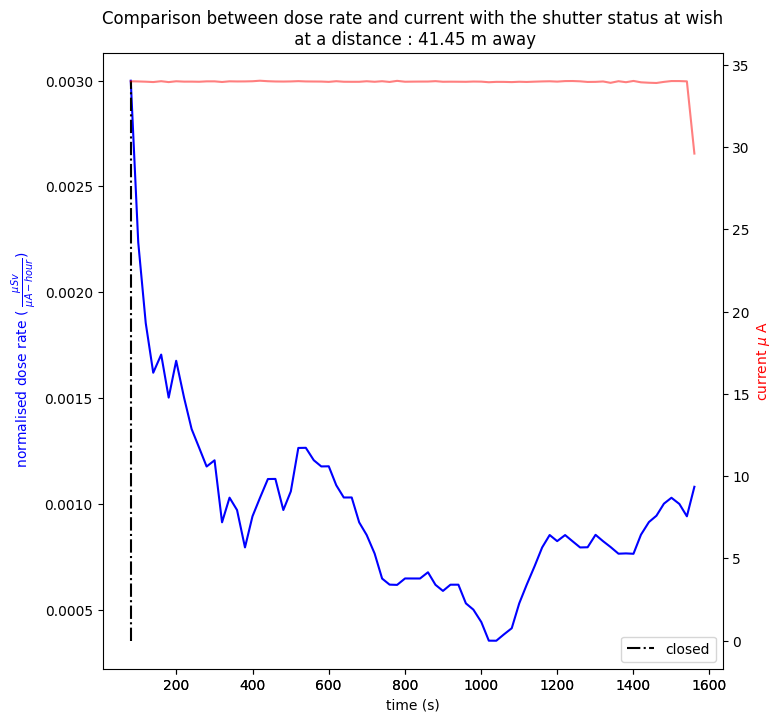

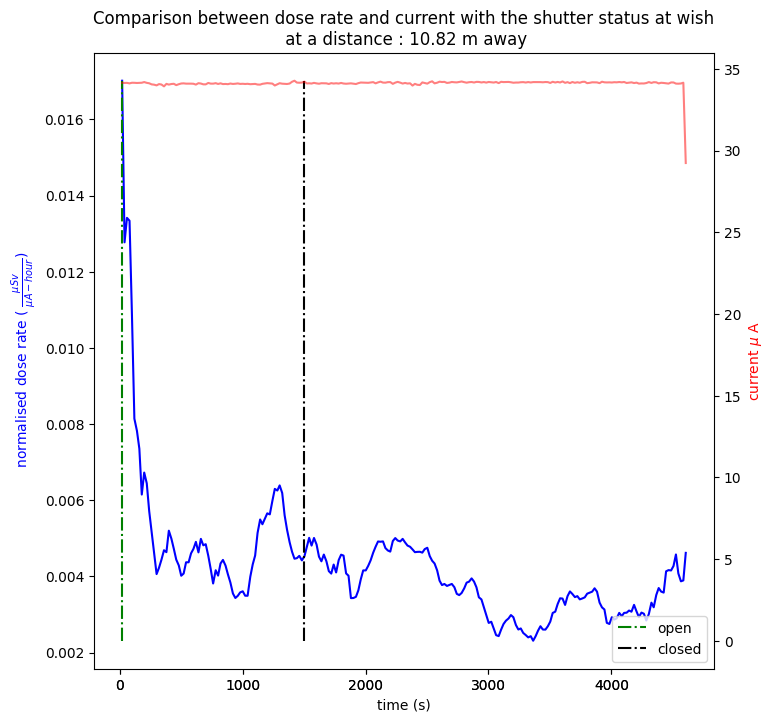

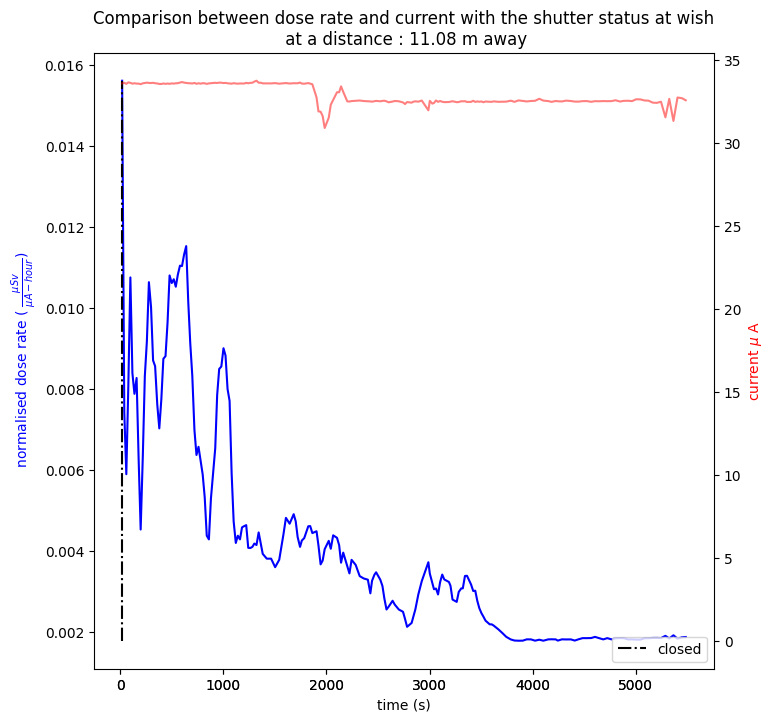

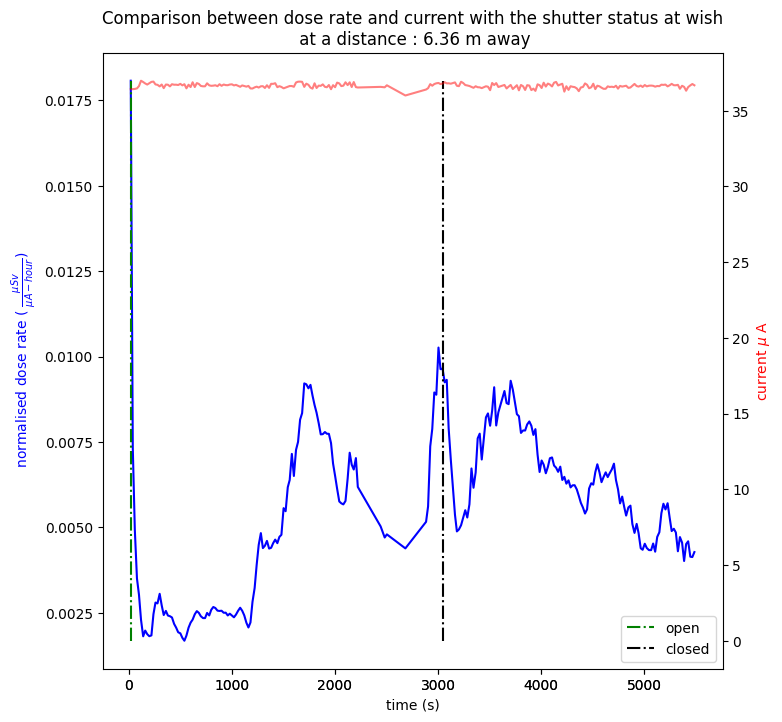

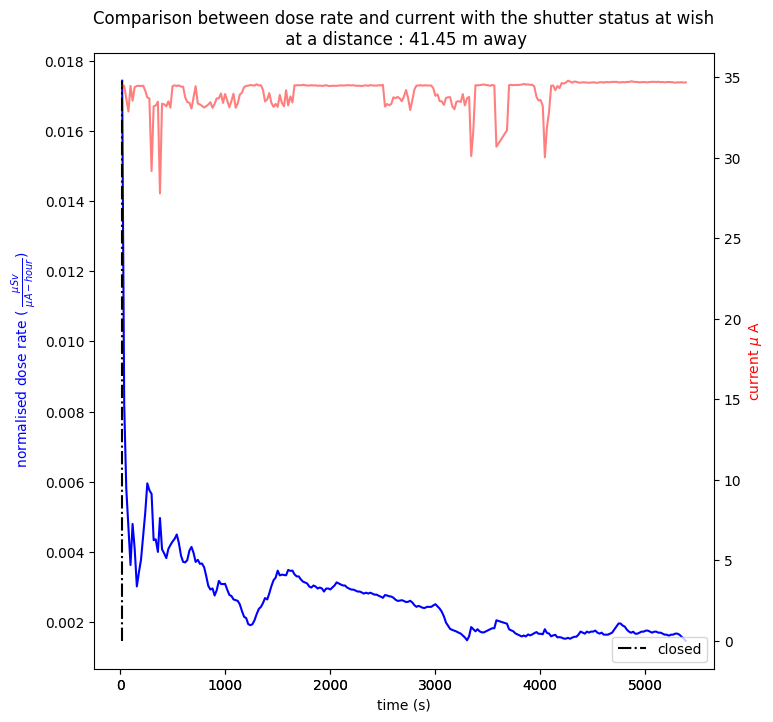

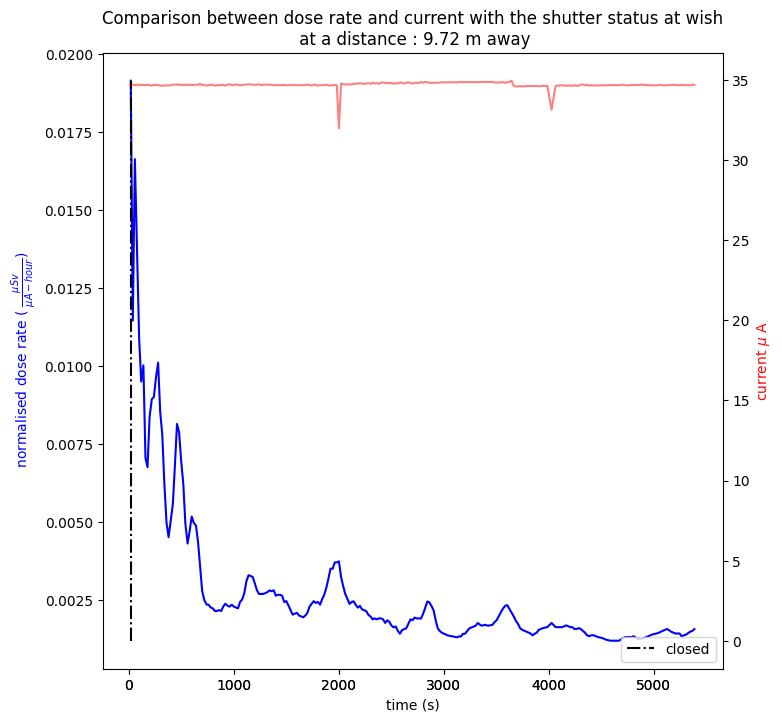

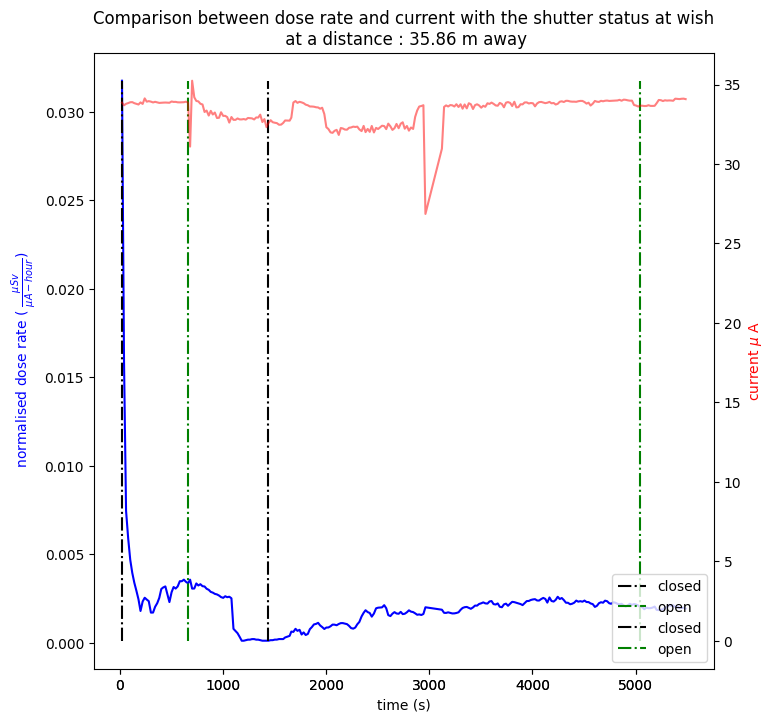

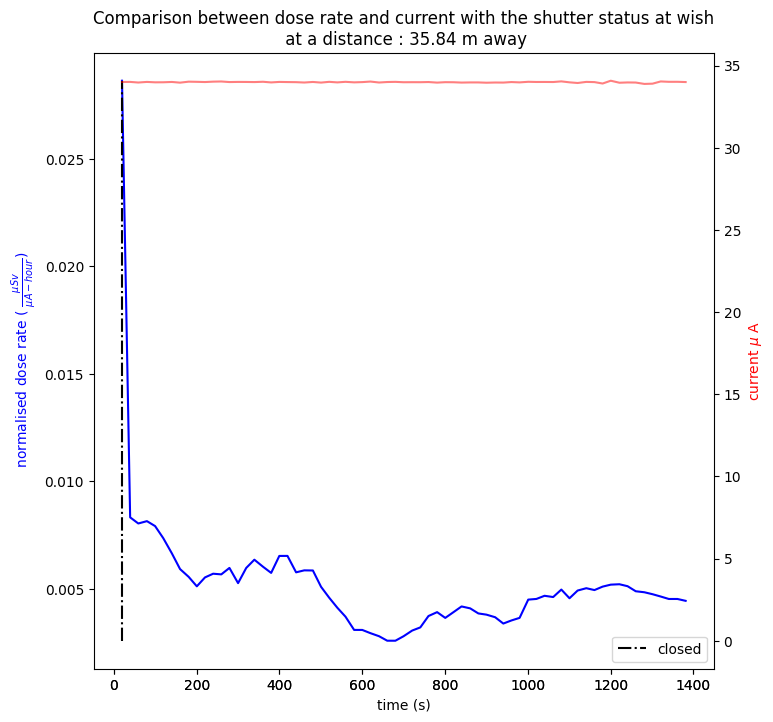

In [125]:
importlib.reload(p)
for key, result in data.items():
    if result["reference"]["Measurement Reference"].iloc[0][1] == "W":
        p.plot_dose_time(result)

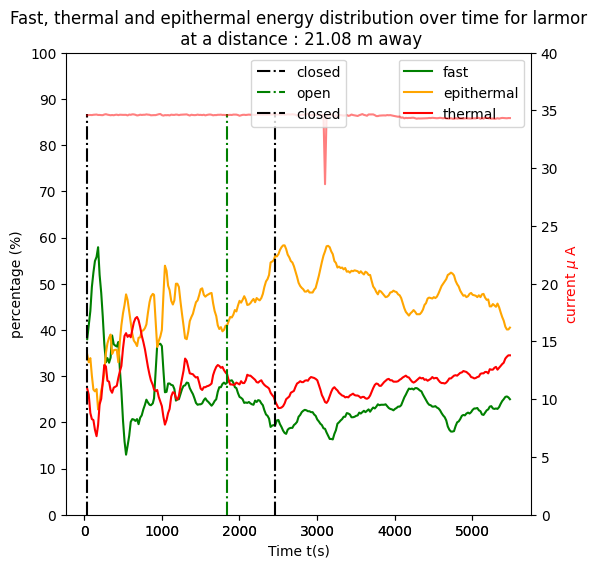

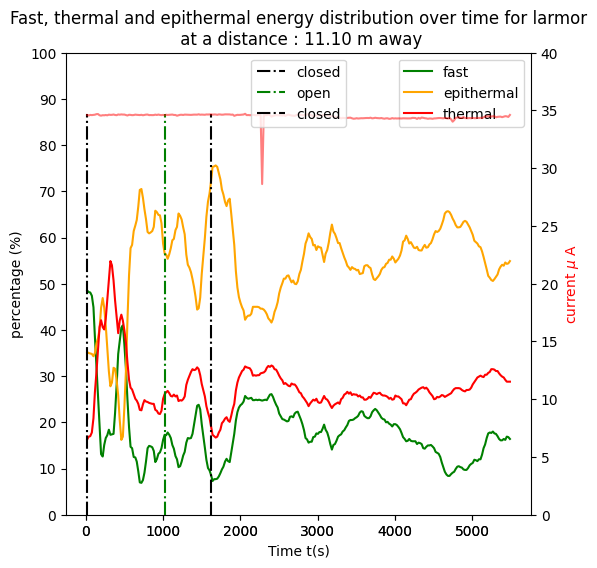

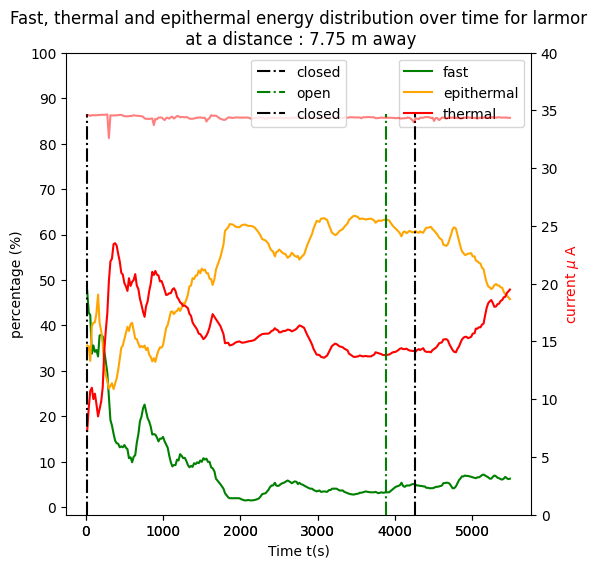

In [8]:
for key, measurement in data.items():
    if measurement["reference"]["Measurement Reference"].iloc[0][1:3] == "Le":
        beamline = da.get_names(measurement["reference"])[1]
        p.plot_energy_time(measurement, key, beamline)

In [ ]:
for key, beamline in beam_df.items():
    if key == "Le":
        p.plot_dose_distance(beamline, key)
        p.plot_combined_spect(beamline, key)
        p.plot_dose_rate(beamline, key)
        p.direction_bar_plot(beamline, key)
        p.stack_bar_plot(beamline, key=key)

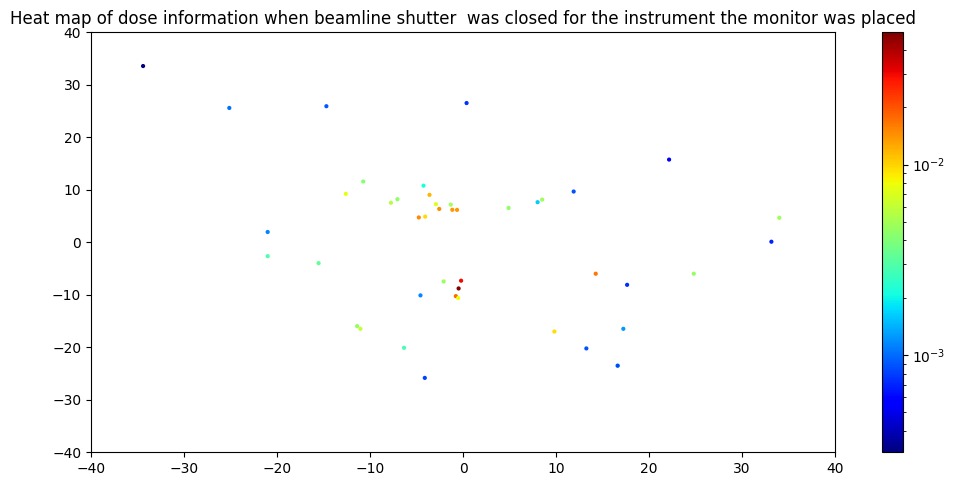

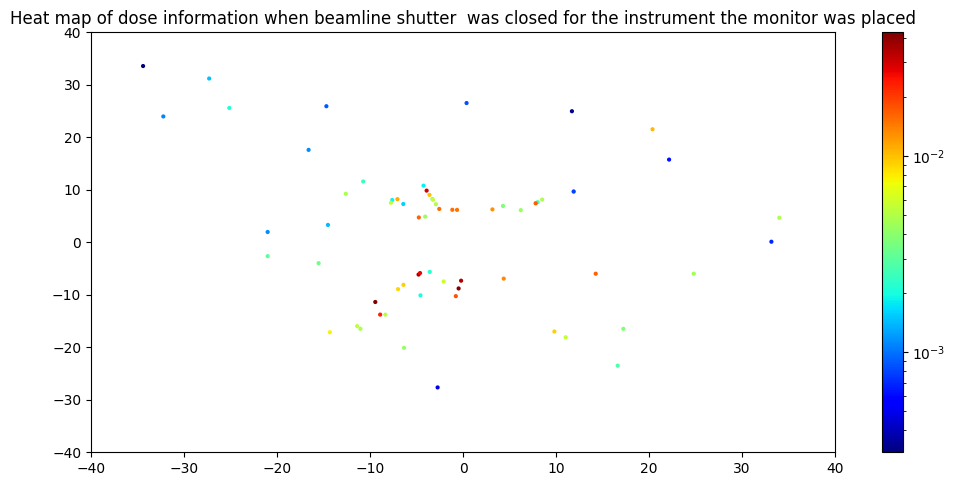

In [ ]:
importlib.reload(p)
p.plot_dose_map(open_shutters)
p.plot_dose_map(closed_shutters)


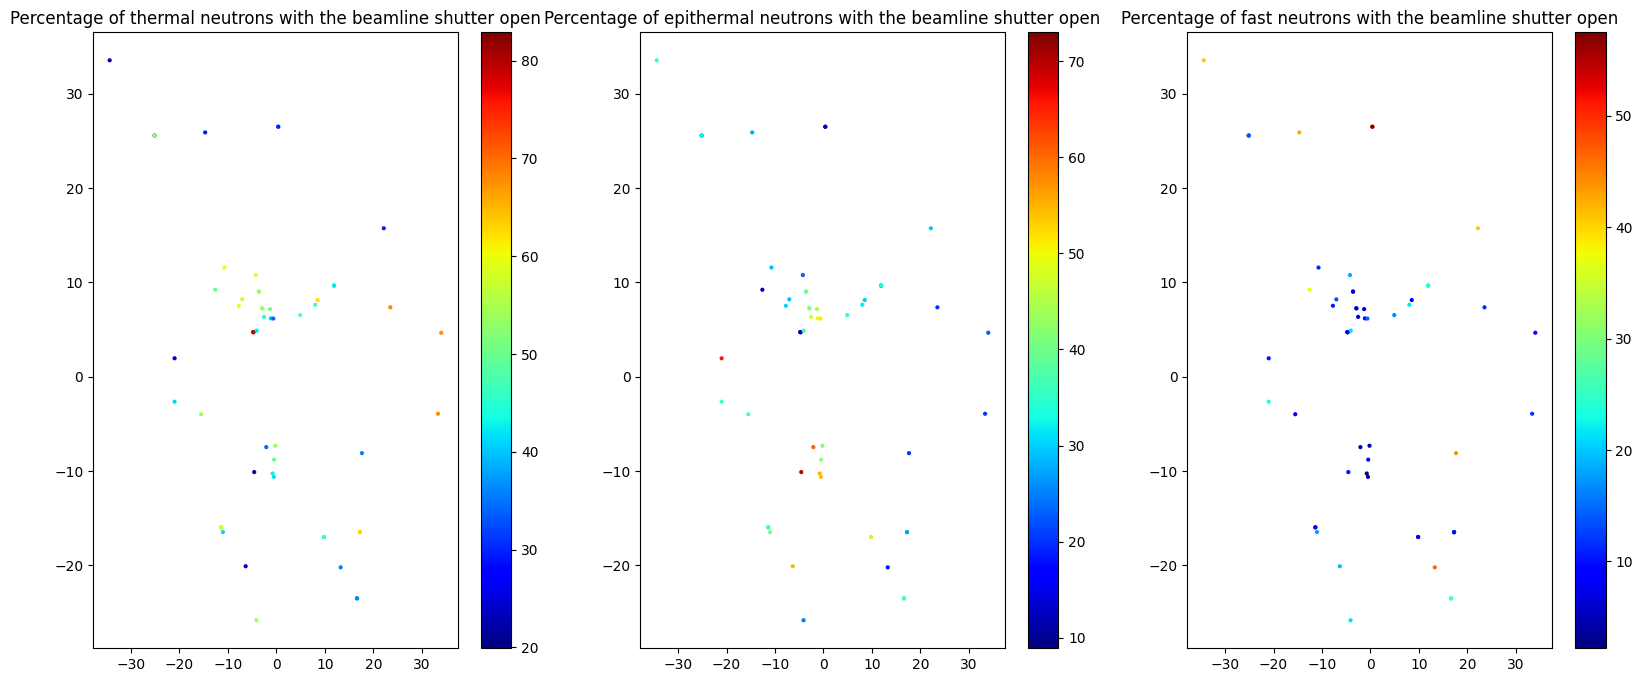

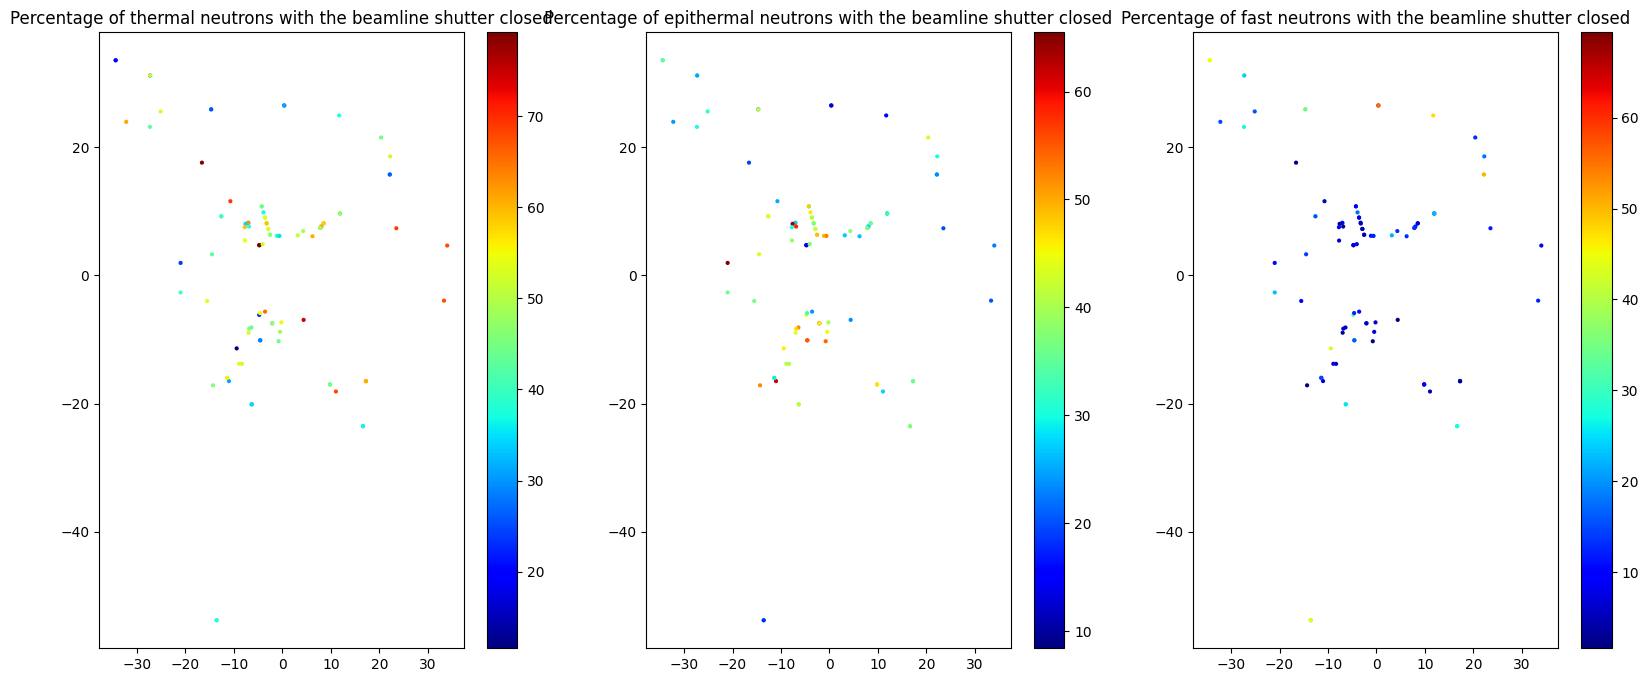

In [ ]:
p.plot_energy_map(open_shutters)
p.plot_energy_map(closed_shutters)

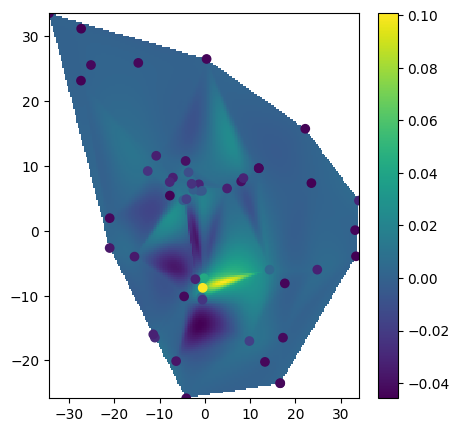

In [97]:
importlib.reload(p)
open_shutters = open_shutters.dropna(subset = ['x', 'y', 'norm_dose'])
points = open_shutters[['x', 'y']].to_numpy()
values = open_shutters["norm_dose"].to_numpy()
p.test(points[:,0], points[:,1], values)

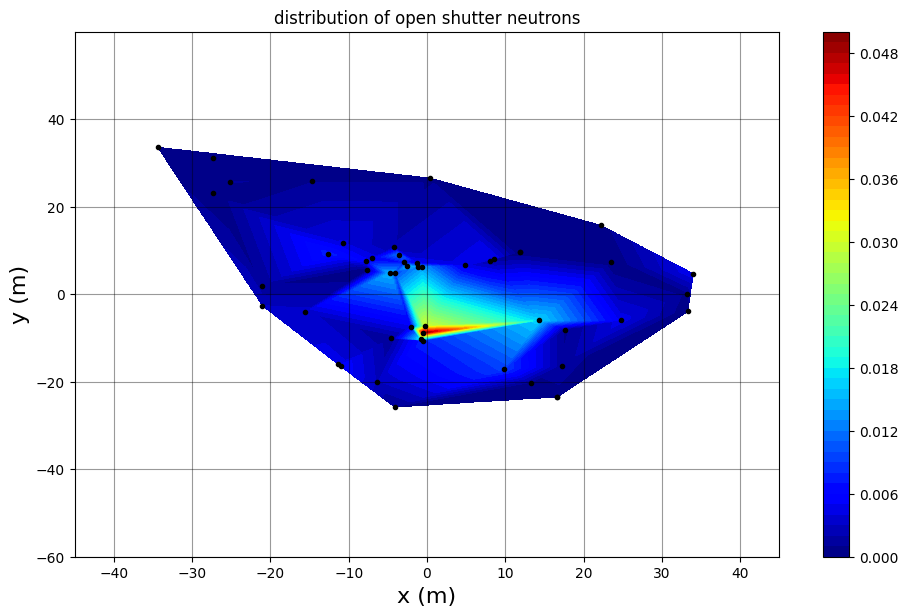

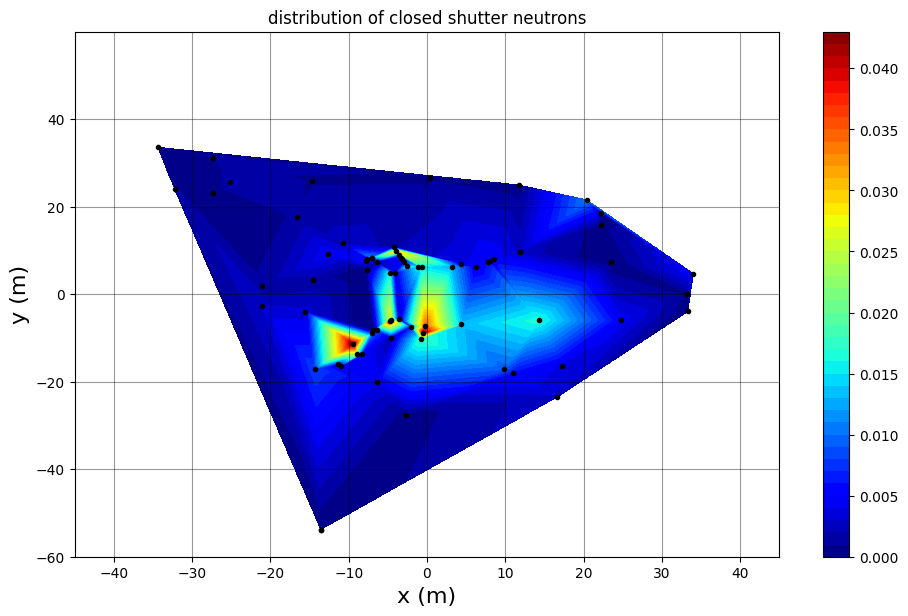

In [113]:
importlib.reload(p)
open_shutters = open_shutters.dropna(subset = ['x', 'y', 'norm_dose'])
points = open_shutters[['x', 'y']].to_numpy()
values = open_shutters["norm_dose"].to_numpy()
p.contour_plot(points[:,0], points[:,1], values, "open shutter", True)

closed_shutters = closed_shutters.dropna(subset = ['x', 'y', 'norm_dose'])
points = closed_shutters[['x', 'y']].to_numpy()
values = closed_shutters["norm_dose"].to_numpy()
p.contour_plot(points[:,0], points[:,1], values, "closed shutter", True)

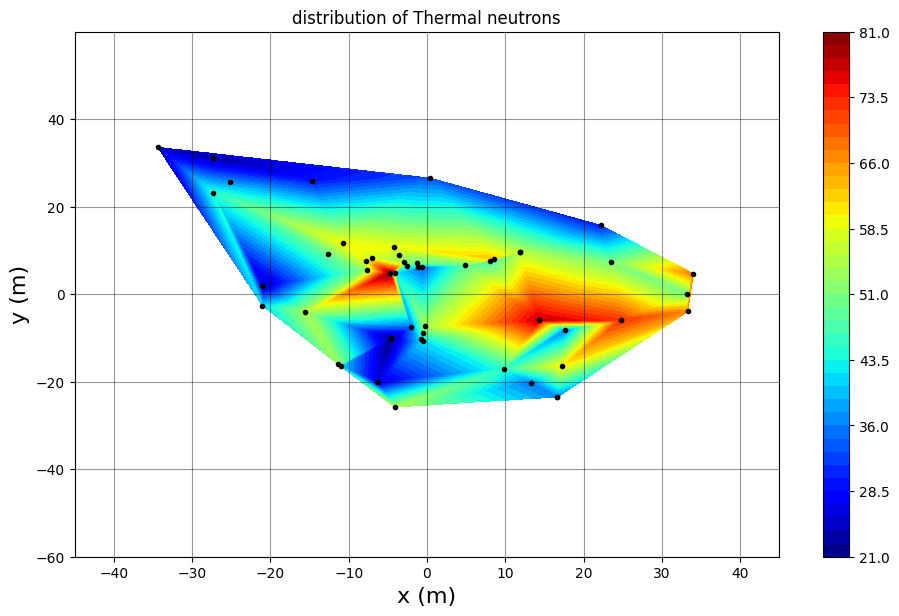

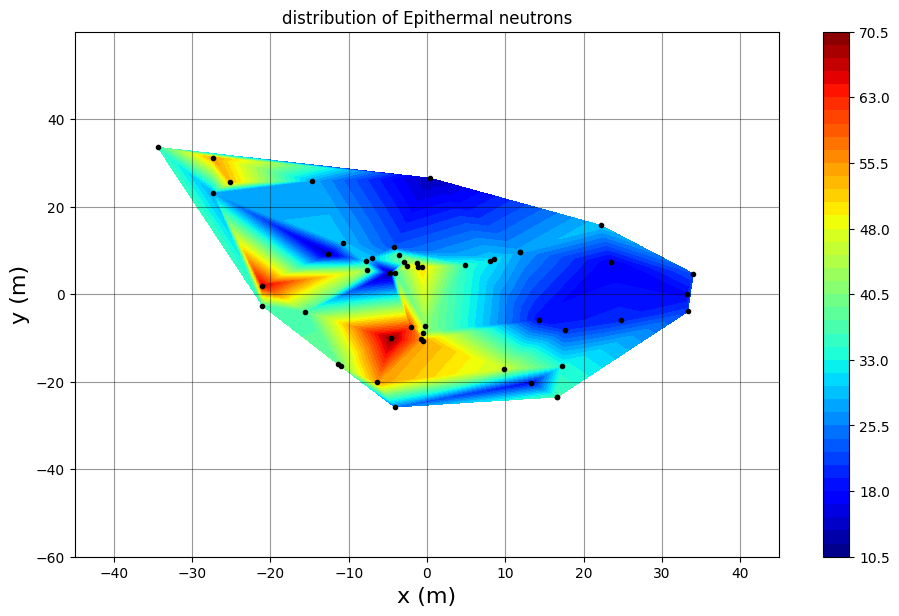

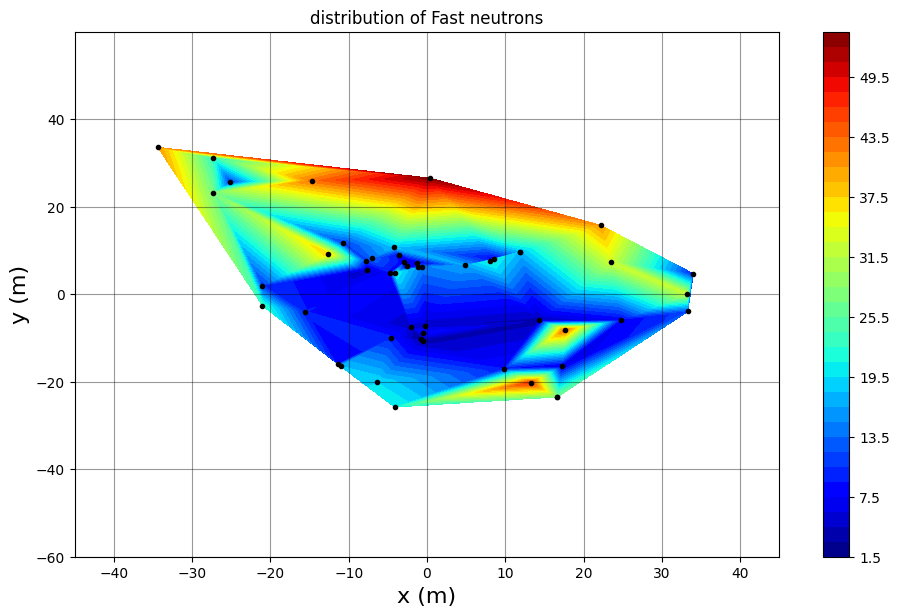

In [123]:
importlib.reload(p)
points  = open_shutters[['x', 'y']].to_numpy()
values = open_shutters[["Ther%", "Epit%", "Fast%"]].to_numpy()
labels = ["Thermal", "Epithermal", "Fast"]
p.contour_plot(points[:,0], points[:,1], values[:,0], labels[0])
p.contour_plot(points[:,0], points[:,1], values[:,1], labels[1])
p.contour_plot(points[:,0], points[:,1], values[:,2], labels[2])

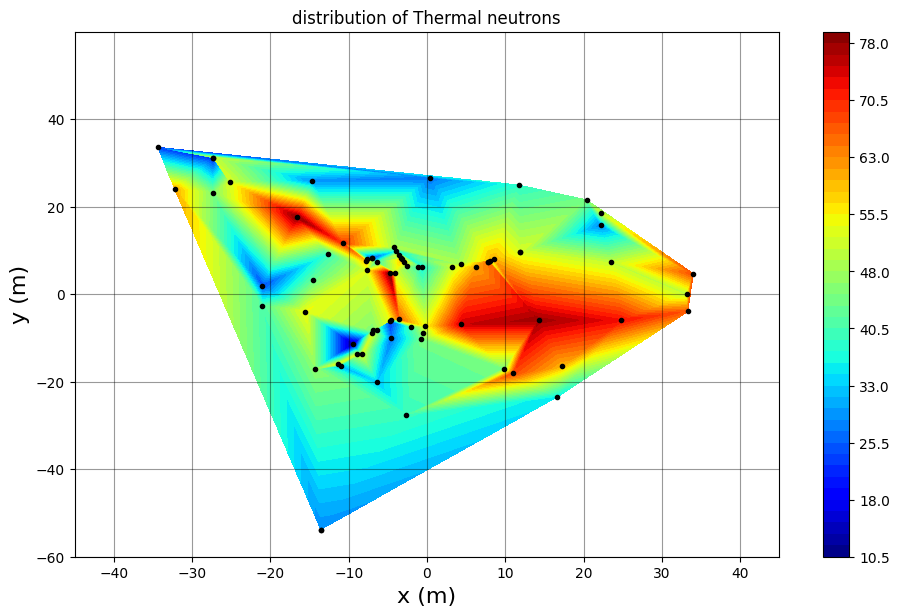

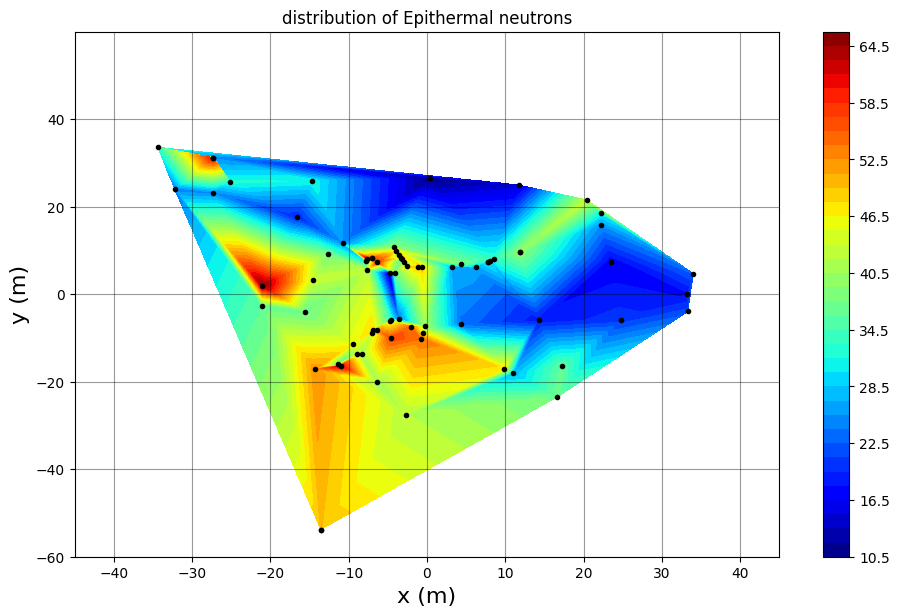

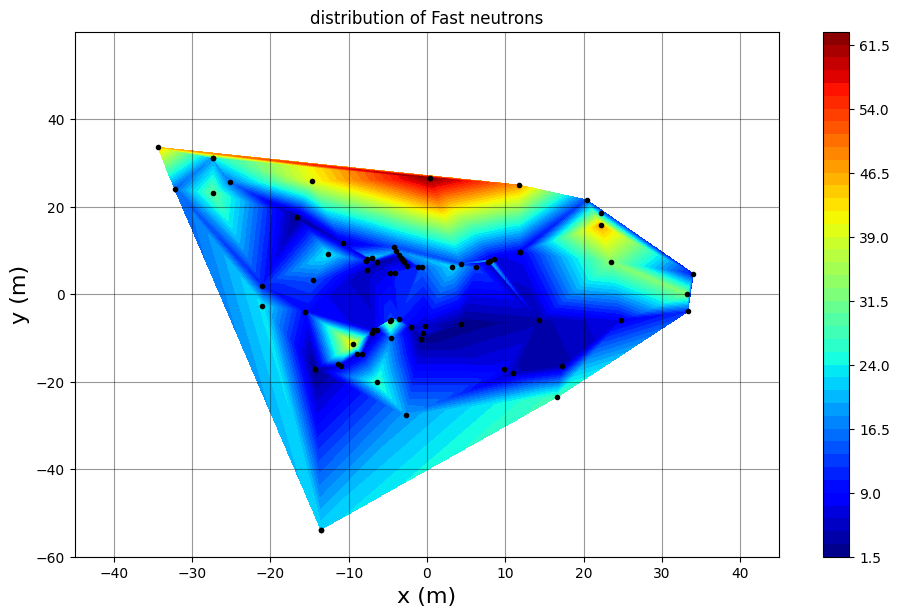

In [122]:
importlib.reload(p)
points  = closed_shutters[['x', 'y']].to_numpy()
values = closed_shutters[["Ther%", "Epit%", "Fast%"]].to_numpy()
labels = ["Thermal", "Epithermal", "Fast"]
p.contour_plot(points[:,0], points[:,1], values[:,0], labels[0])
p.contour_plot(points[:,0], points[:,1], values[:,1], labels[1])
p.contour_plot(points[:,0], points[:,1], values[:,2], labels[2])